## Contents 

#### 01. Importing libraries and data

#### 02. Subsetting, wrangling and cleaning data

#### 03. Testing for stationarity

#### 04. Stationarizing the data

### 01. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
path = 'C:/Users/David/Desktop/Career Foundry/King County house sales'

In [3]:
# Import KC house sales data using path 
kc_houses = pd.read_csv(os.path.join(path, '02. Data', '02. Prepared Data', 'kc_houses_updated2.csv'))

In [4]:
kc_houses.head()

,Unnamed: 0,house_id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,7129300520,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Low-level
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,6414100192,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Mid-Level 1
2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,5631500400,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Low-level
3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,2487200875,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Mid-Level 2
4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,1954400510,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Mid-Level 1


### 02. Subsetting, wrangling and cleaning data

Subsetting so that I can use 'date_sold' and price. I will be using average prices as "price". 

In [5]:
# Create a subset with 'date,'  and 'price' columns
df_sub = kc_houses[['date_sold', 'price']]

In [6]:
df_sub['date_sold'] = pd.to_datetime(df_sub['date_sold'])

In [7]:

# Calculate the average price for each unique combination of 'date_sold' and 'price'
average_prices = df_sub.groupby(['date_sold'])['price'].mean().reset_index()

# Display the resulting DataFrame with average prices
print(average_prices)

     date_sold         price
0   2014-05-02  5.262515e+05
1   2014-05-03  4.669700e+05
2   2014-05-04  5.766900e+05
3   2014-05-05  5.809386e+05
4   2014-05-06  5.340479e+05
..         ...           ...
367 2015-05-13  5.116239e+05
368 2015-05-14  6.034363e+05
369 2015-05-15  4.500000e+05
370 2015-05-24  4.455000e+05
371 2015-05-27  1.310000e+06

[372 rows x 2 columns]


In [8]:
df_sub = average_prices

In [9]:
df_sub

,date_sold,price
0,2014-05-02,5.262515e+05
1,2014-05-03,4.669700e+05
2,2014-05-04,5.766900e+05
3,2014-05-05,5.809386e+05
4,2014-05-06,5.340479e+05
...,...,...
367,2015-05-13,5.116239e+05
368,2015-05-14,6.034363e+05
369,2015-05-15,4.500000e+05
370,2015-05-24,4.455000e+05


In [10]:
# Set the "Date" column as the index

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['date_sold']) # Create a datetime column from "Date.""
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub.drop(['date_sold'], axis=1, inplace=True) # Drop the "Date" column.
df_sub.head()

,price
datetime,
2014-05-02,526251.492537
2014-05-03,466970.000000
2014-05-04,576690.000000
2014-05-05,580938.607143
2014-05-06,534047.903614


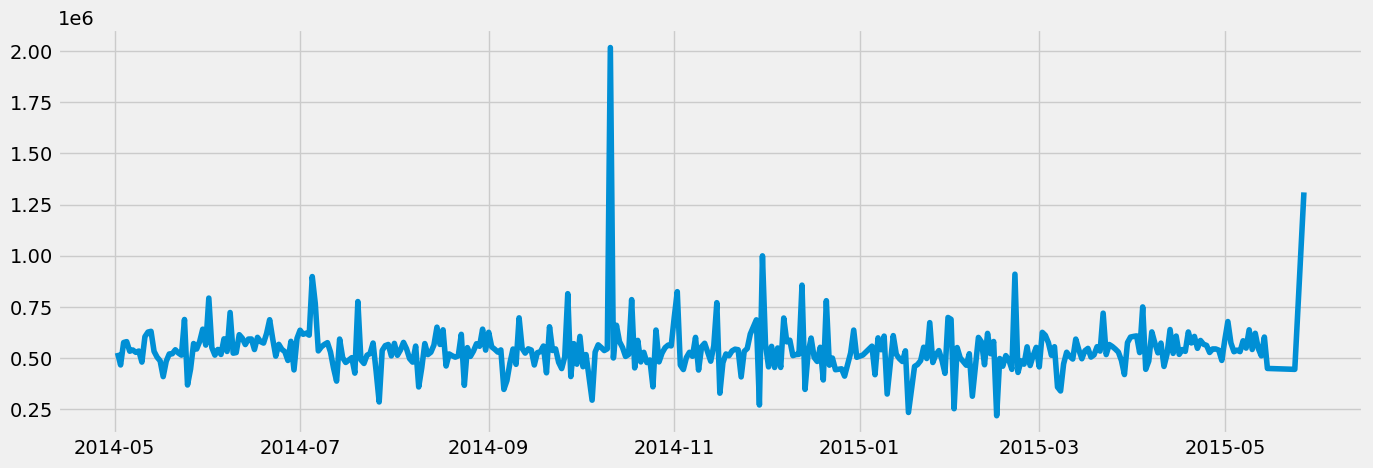

In [11]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [12]:
# Check for missing values (you shouldn't have any)

df_sub.isnull().sum() 

price    0
dtype: int64

In [13]:
# Check for dups
dups = df_sub.duplicated()
dups.sum()

0

The shape of the graph indicates stationarity, however, I will be testing in the next step. 

### 03. Testing for stationarity

In [14]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -19.296141
p-value                          0.000000
Number of Lags Used              0.000000
Number of Observations Used    371.000000
Critical Value (1%)             -3.448100
Critical Value (5%)             -2.869362
Critical Value (10%)            -2.570937
dtype: float64


The very large negative value suggests strong evidence against the null hypothesis.The p-value is very close to zero. A small p-value (typically less than 0.05) indicates that the null hypothesis can be rejected. In this case, I can reject the presence of a unit root, suggesting that the time series is stationary, as suspected.